<a href="https://colab.research.google.com/github/irisnoww/customer-analytics/blob/main/Customer_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Analytics**

The notebook focuses on how to perform customer segmentation. It involves the application of hierarchical and flat clustering techniques for
dividing customers into groups. It also features applying the Principal Components Analysis (PCA) to
reduce the dimensionality of the problem, as well as combining PCA and K-means for an even more
professional customer segmentation.

- Segmentating, targeting and positioning

- Marketing Mix
- Price elasticity


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
#overwrite matplotlib with seaborn
sns.set()
from sklearn.preprocessing import StandardScaler
#dendrogram:tree-like,hierarchical respresentaition of 
#linkage: specific employed method
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
wb = gc.open_by_url("https://docs.google.com/spreadsheets/d/10NM_lfW6Ci7dP3eVOMN6PvdKVd_xTlr5F1XecNEjm90/edit#gid=324900199")

In [ ]:
def data_input(tab):
  data = pd.DataFrame(wb.worksheet(tab).get_all_values())
  header = data.iloc[0]
  data = data[1:]
  data.columns = header
  return data

In [ ]:
df_segmentation = data_input('segmentation data')

In [ ]:
df_segmentation.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,100000001,0,0,67,2,124670,1,2
2,100000002,1,1,22,1,150773,1,2
3,100000003,0,0,49,1,89210,0,0
4,100000004,0,0,45,1,171565,1,1
5,100000005,0,0,53,1,149031,1,1


# Clustering

In [ ]:
df_segmentation = df_segmentation.set_index("ID")

In [ ]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sex              2000 non-null   object
 1   Marital status   2000 non-null   object
 2   Age              2000 non-null   object
 3   Education        2000 non-null   object
 4   Income           2000 non-null   object
 5   Occupation       2000 non-null   object
 6   Settlement size  2000 non-null   object
dtypes: object(7)
memory usage: 125.0+ KB


In [ ]:
#conver to int
df_segmentation['Age'] = df_segmentation['Age'].astype(int)
df_segmentation['Income'] = df_segmentation['Income'].astype(int)
df_segmentation['Settlement size'] = df_segmentation['Settlement size'].astype(int)
df_segmentation['Education'] = df_segmentation['Education'].astype(int)
df_segmentation['Sex'] = df_segmentation['Sex'].astype(int)
df_segmentation['Marital status'] = df_segmentation['Marital status'].astype(int)
df_segmentation['Occupation'] = df_segmentation['Occupation'].astype(int)

In [ ]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


correlation estimate
identify similar consumers into groups --> essence of segmentation

In [ ]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,,,,,,,
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

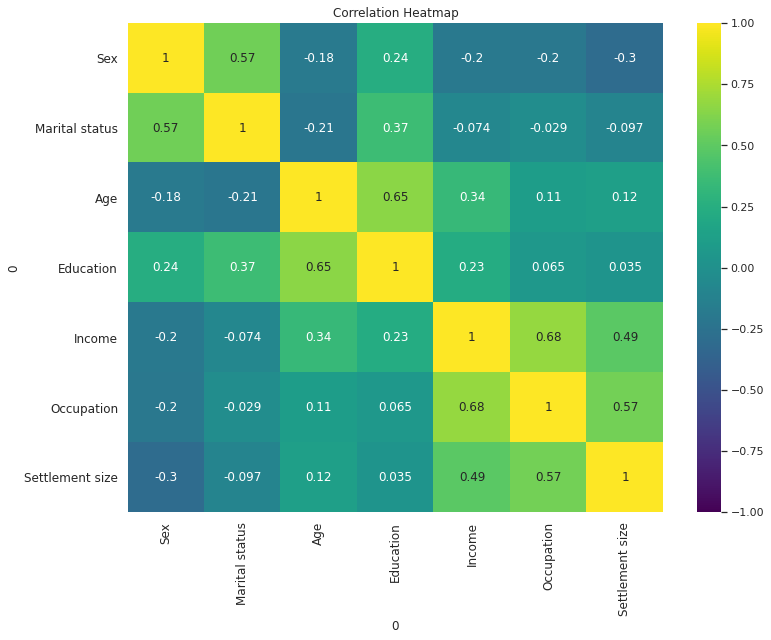

In [ ]:
#heatmap to illustrate correlation
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot=True,
                cmap= 'viridis',
                vmin = -1, 
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Visualization of rawdata')

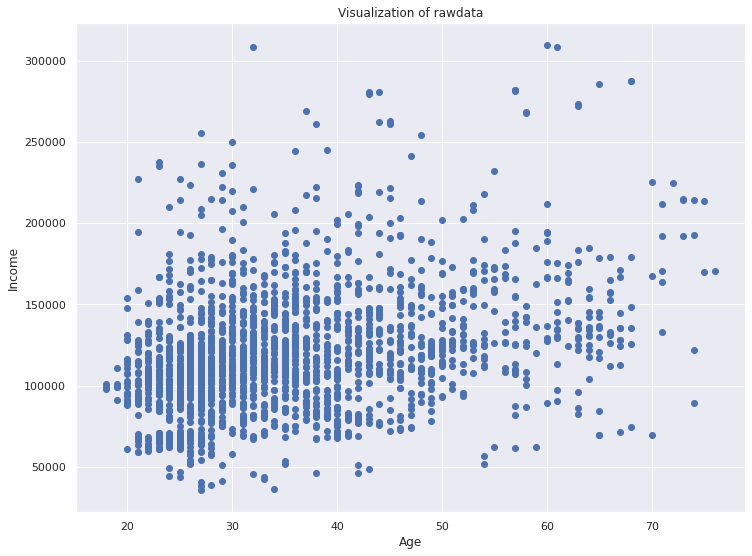

In [ ]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')   
plt.title('Visualization of rawdata')                                                       

Preprrocessing
- standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
segmentation_std = scaler.fit_transform(df_segmentation)

Hieracrchical Clustering
- **Hierachical**
    - Diveisitve(Top Down)
    - Agglomerative (Bottom up) (easier to solve mathmatically)
      - Euclidean distance
      - Manhattan distance
      - Maximum distance


In [ ]:
#Perform hierarchical/agglomerative clustering.
#retrun linkage matrix
#contains the clustering solution
hier_clust = linkage(segmentation_std, method = 'ward')


The dendrogram illustrates how each cluster is composed by drawing a **U-shaped** link between a non-singleton cluster and its children. 

The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the cophenetic distance between original observations in the two children clusters.


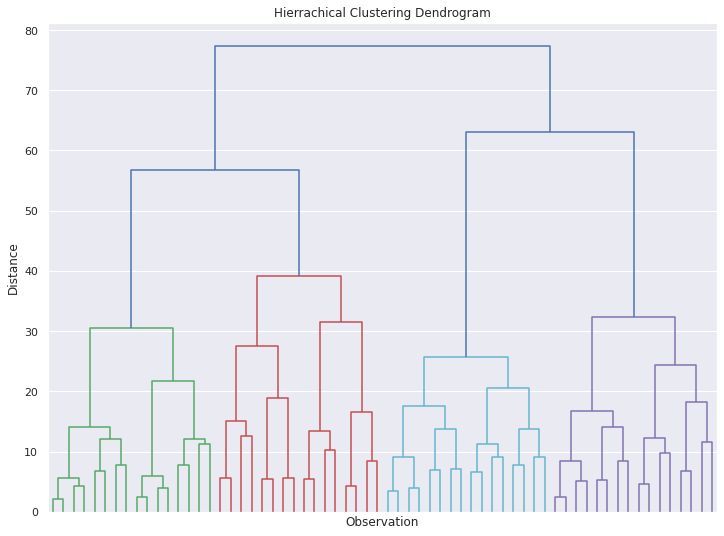

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Hierrachical Clustering Dendrogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
#Plot the hierarchical clustering as a dendrogram.
#color coded
dendrogram(hier_clust,
           #add truncate mode to condense chart
           truncate_mode = 'level',
           #specify number for truncate_mode
           p = 5,
           show_leaf_counts = False,
           no_labels = True
           )
plt.show()

we need to fina a horizontal line on the dendrogram on which to cut:
- rule of the thumb: the longest vertical line unitercepted by a horizontal line from the dendrogram. This is where we should make the cut.

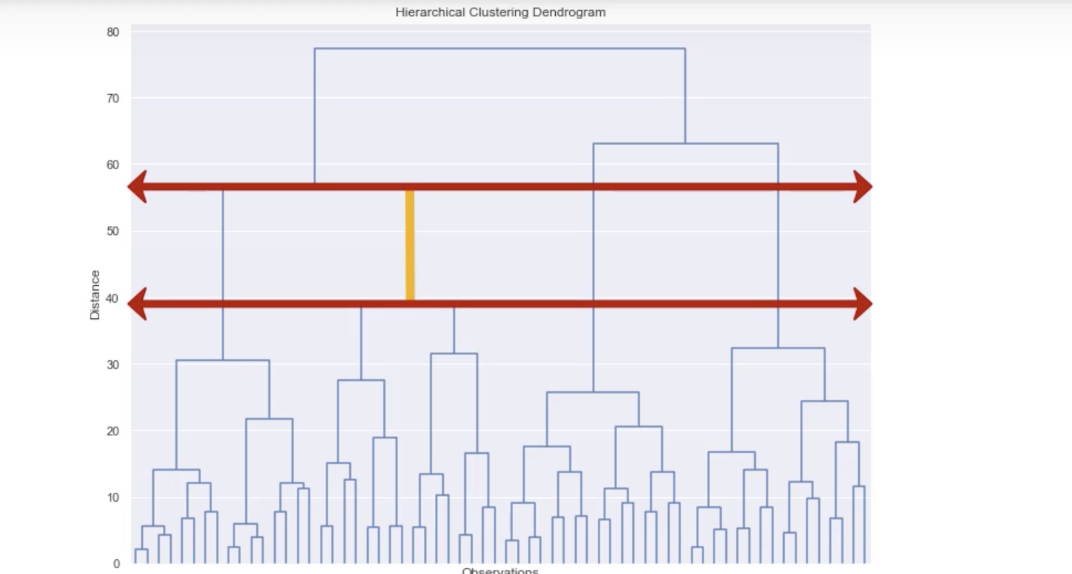

Hierarchical clustering takes longer to compute, so not very practical. 
One advantage would be it finds the number of clusters.

If no prior knowledge of number of clusters --> 
Start with Hierarchical clustering to determine clusters, then move on to Flat clustering for segmentation

# **K-means Clusterings**

- K the number of clusters
- specify clusters seeds(starting centroid: choosing randomly or specify by ds based on prior knowledge)
- assign points to diff centroid based on distance: Euclidean squared distance
- calculate the centroid or the geometrical center

Isuues:
- is quite sensitive to outliers
  - sovled by K-median clustering but expensive
- need to choose K
- K-means enforces spherical clusters





In [ ]:
wcss = []
for i in range(1,11):
  #kmeans++ is an initialization algorithm that finds the best cluster seeds
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans.fit(segmentation_std)
  wcss.append(kmeans.inertia_)

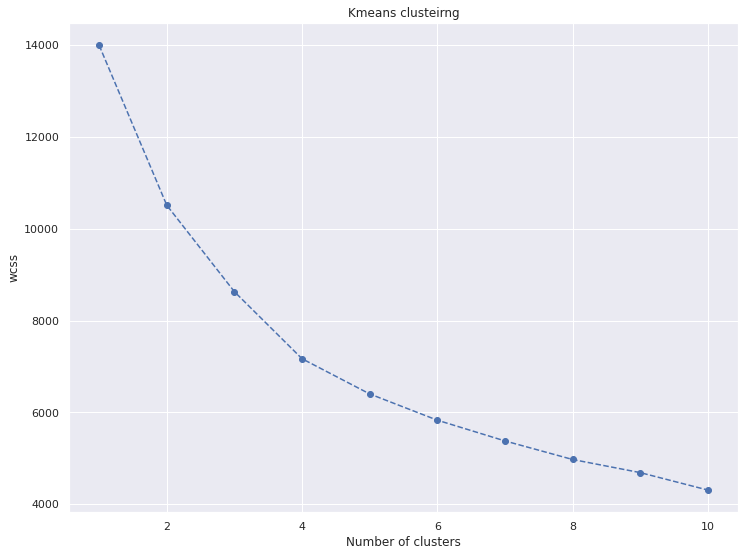

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Kmeans clusteirng')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')

Depending on the shape of this graph, we make  a decision about the number of clusters:
Elbow Method

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=48)

In [ ]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=48, tol=0.0001, verbose=0)

Attributes for KMeans

- **labels_** : *ndarray of shape (n_samples,)*
Labels of each point

- **inertia_**float *italicized text*
Sum of squared distances of samples to their closest cluster center.

In [ ]:
df_segmentation_kmeans = df_segmentation.copy()
df_segmentation_kmeans['Segment K-means'] = kmeans.labels_

In [ ]:
df_segmentation_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,3
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


In [ ]:
df_segmentation_analysis = df_segmentation_kmeans.groupby(['Segment K-means']).mean()

In [ ]:
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


In [ ]:
#Note: here in the 'groupby' statement, we need to include a second argument(column), in order to count each row in the table
#can chose an arbitrary column
df_segmentation_analysis['N Obs']=df_segmentation_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()


In [ ]:
df_segmentation_analysis['Prop Obs']=df_segmentation_analysis['N Obs']/df_segmentation_analysis['N Obs'].sum()

In [ ]:
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


In [ ]:
#rename each cluster
df_segmentation_analysis.rename({0:'well-off',
                                 1:'fewer opportunities',
                                 2:'standard',
                                 3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunities,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


In [ ]:
#visualize raw data
df_segmentation_kmeans['labels'] =df_segmentation_kmeans['Segment K-means'].map({0:'well-off',
                                 1:'fewer opportunities',
                                 2:'standard',
                                 3:'career focused'})

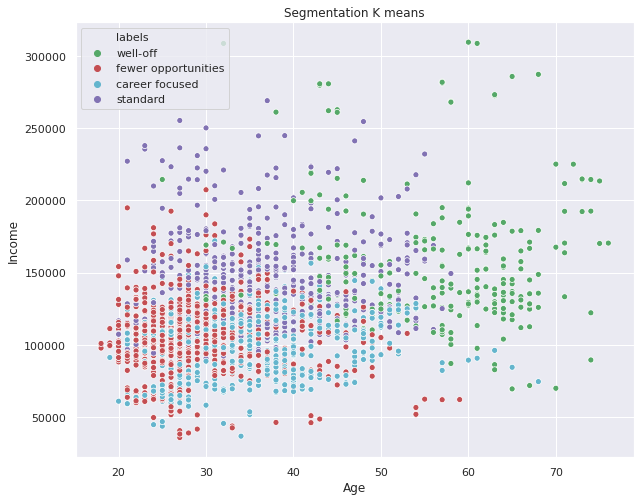

In [ ]:
#initialize the x and y axis first for convenience
x_axis = df_segmentation_kmeans['Age']
y_axis = df_segmentation_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segmentation_kmeans['labels'], palette=['g','r','c','m'])
plt.title('Segmentation K means')
plt.show()

we could see the green cluster is seperated at the far upper right corner, but the remaining clusters are kind of overlapped together.

**K-means clustering with PCA**

- PCA #components = #features
- arranged in order of *importance*(indicates how much the variance of our data is explained by each component)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
#pca applied linear transformation which created 7 new variables
#7 components explain 100 % of the variability of the data
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

fina a subset of components, while preserving variance ---> most prominent components, choose ones containing most of the variance.


Text(0, 0.5, 'Cumlulative the variance')

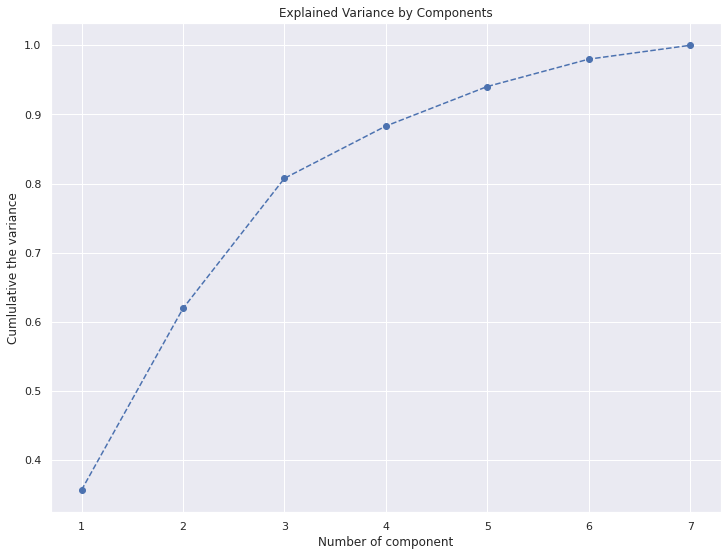

In [ ]:
#viz the components to choose from the top
#use cumsum() to get cumlative 
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of component')
plt.ylabel('Cumlulative the variance')

How do we actually choose the number of components?
- Rule of thumb: keep at least 70-80% of the explained variance 
- In this case, we may choose 3

In [ ]:
#choose 3 components
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

PCA results
- The shapes of the array Loading: correlation between an priginal variable and a componet; e.g the first value of the array(-0.31469524) shows the loading of the first feature on the first component
- Values are in range[-1,1] as they are correlations : the closer a result is to 0 the lower the loading of a variable onto a component


In [ ]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [ ]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1','Component 2','Component 3']
                           )
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f9be1ad3940>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

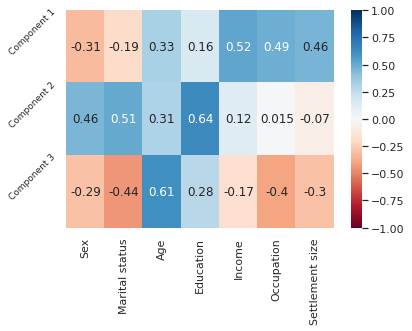

In [ ]:
#heatmap
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap='RdBu',
            annot = True)
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 9)

we observed that marital status and occupation load negatively but are still important

In [ ]:
#our original data refers to the original 7 features (7 dimensional),
#must transform it into 3-dimension
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
scores_pca = pca.transform(segmentation_std)

In [ ]:
scores_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

K means clusteirng with PCA
- Note that the component scores are standardized by definition


In [ ]:
wcss = []
for i in range(1,11):
  #kmeans++ is an initialization algorithm that finds the best cluster seeds
  kmeans_pca = KMeans(n_clusters = i, init='k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

In [ ]:
wcss

[11307.57113594592,
 7831.376924840528,
 5954.490285557033,
 4543.102523171213,
 3834.8071569968824,
 3317.518947042475,
 2871.210408552161,
 2563.510339647136,
 2270.9749110030366,
 2009.9717091267971]

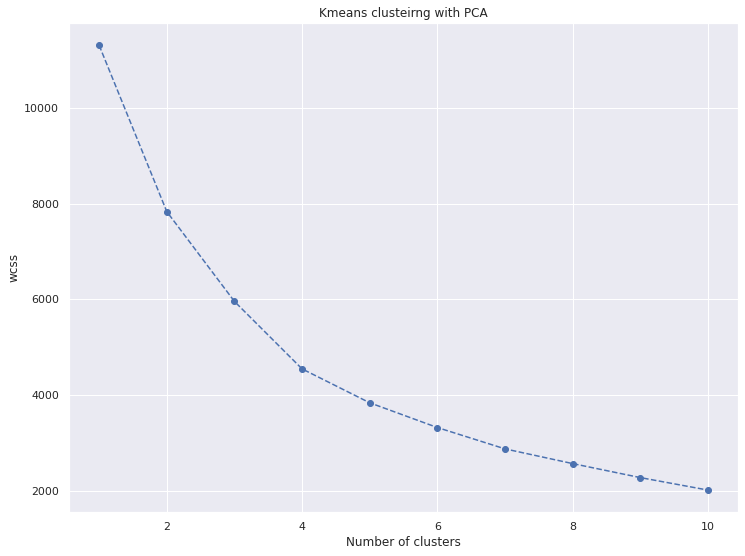

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Kmeans clusteirng with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#create a new dataframe with original features and pca scores
#concat original df with scores_pca
df_segmentation_kmeans_pca = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)], axis= 1)
#rename the column name
df_segmentation_kmeans_pca.columns.values[-3:]= ['Component 1', 'Component 2', 'Component 3']
#add cluster labels
df_segmentation_kmeans_pca['Kmeans label'] = kmeans_pca.labels_

In [ ]:
df_segmentation_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Kmeans label
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [ ]:
# We calculate the means by segments.
df = df_segmentation_kmeans_pca.groupby(['Kmeans label']).mean()

In [ ]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Kmeans label,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [ ]:
# Calculate the size of each cluster and its proportion to the entire data set.
df['Nobs'] = df_segmentation_kmeans_pca[['Kmeans label','Sex']].groupby(['Kmeans label']).count()
df['Prop'] = df['Nobs']/len(df_segmentation_kmeans_pca)

In [ ]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Nobs,Prop
Kmeans label,,,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


𝐏𝐥𝐨𝐭 𝐃𝐚𝐭𝐚 𝐛𝐲 𝐏𝐂𝐀 𝐂𝐨𝐦𝐩𝐨𝐧𝐞𝐧𝐭𝐬 1 𝐚𝐧𝐝 3

The next two plots depict our data by the remaining components. The first plot shows Component 1 and 3.
We can see there is a more significant overlap between the purple and green segments - that of the career-focused 
and well-off respectively.
The second plot shows the data by Components 2 and 3. 
We can observe there is significant overlap between the purple and blue segments - the career-focused and fewer-opportunities.
In general, it does not appear that we can separate he clusters easily on this graph. 
The reason is that the second and third components contain less of the variance of the data set,
which is why PCA returns the components in order of importance.



In [ ]:
df_segmentation_kmeans_pca['legend']=df_segmentation_kmeans_pca['Kmeans label'].map({0:'Young professional',
                                                                                     1:'Career focused',
                                                                                     2:'Fewer opportunitites',
                                                                                     3:'Well-off'})

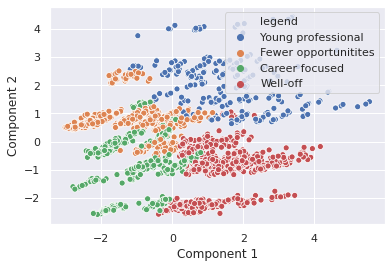

In [ ]:
x_axis_12 = df_segmentation_kmeans_pca['Component 1']
y_axis_12 = df_segmentation_kmeans_pca['Component 2']
sns.scatterplot(x_axis_12,y_axis_12,hue=df_segmentation_kmeans_pca['legend'])

comparing without pca
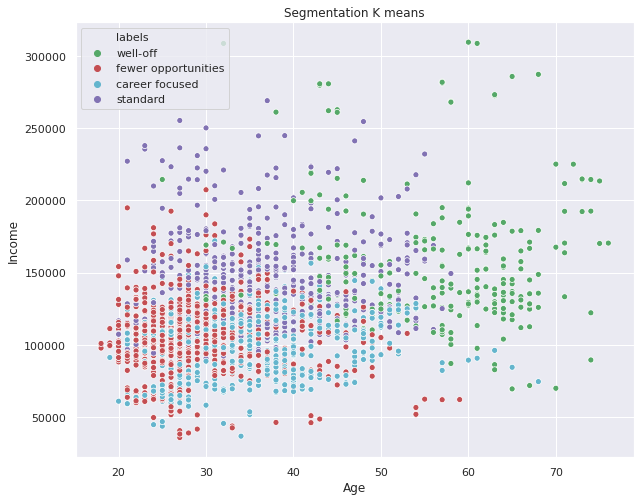

More distinguishble--> whole point of PCA
Reduce the number of vairables by combining them into bigger meaningful features

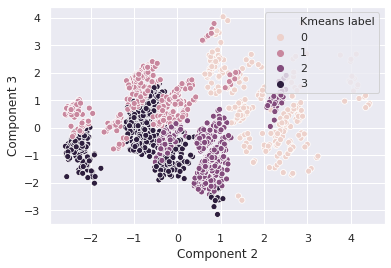

In [ ]:
x_axis_23 = df_segmentation_kmeans_pca['Component 2']
y_axis_23 = df_segmentation_kmeans_pca['Component 3']
sns.scatterplot(x_axis_23,y_axis_23,hue=df_segmentation_kmeans_pca['Kmeans label'])

Data Export

In [ ]:
import pickle
#a module used to turn python objects into string streams

In [ ]:
#first we need the scaler to preprocessing future data in the same way
pickle.dump(scaler, open('scaler.pickle','wb'))

In [ ]:
#also need the 'pca' and 'kmeans_pca' objects
pickle.dump(pca, open('pca.pickle','wb'))

In [ ]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

# Purchase Analytics

Purchasing Analytics
- purrchase probability
- brand choice probability
- purchase quantity


Data Exploration

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1s2rj1vP8pOGhYtw2MkhFFMoViPiYbvf4w7B2gWtBQNc/edit#gid=1358805181')

In [ ]:
purchase_df = data_input('purchase data')

In [ ]:
purchase_df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
2,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
3,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
4,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
5,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [ ]:
#convert all cols to numeric
cols = purchase_df.columns.drop('ID')
#If ‘coerce’, then invalid parsing will be set as NaN.
purchase_df[cols] = purchase_df[cols].apply(pd.to_numeric, errors='coerce')

Data dictionary

since we don't have an equal number of records per customer or an equal number of records per day, descriptive stats would be meaningless but we can check for missing values

In [ ]:
purchase_df.isnull().sum()

0
ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

Applying Segmentation 

In [ ]:
import pickle
scaler=pickle.load(open('scaler.pickle','rb'))

In [ ]:
pca = pickle.load(open('pca.pickle','rb'))

In [ ]:
kmeans_pca=pickle.load(open('kmeans_pca.pickle','rb'))

In [ ]:
features = purchase_df[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
purchase_df_segm_std = scaler.transform(features)

In [ ]:
#get pca scores for every line
purchase_df_segm_std=pca.transform(purchase_df_segm_std)

In [ ]:
purchase_segm_kmeans_pca = kmeans_pca.predict(purchase_df_segm_std)

In [ ]:
purchase_df_predictors = purchase_df.copy()

In [ ]:
purchase_df_predictors['Segment']=purchase_segm_kmeans_pca

Descrriptive Analysis by Segments

In [ ]:
purchase_df_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
1,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,1
2,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
3,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
4,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1
5,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,1


In [ ]:
#as_index: For aggregated output, return object with group labels as the index. 
#Only relevant for DataFrame input. as_index=False is effectively “SQL-style” grouped output.
temp_1 = purchase_df_predictors[['ID','Incidence']].groupby(['ID'], as_index = False).count()

In [ ]:
temp_1.set_index(['ID'],inplace = True)
temp_1 = temp_1.rename(columns={'Incidence':'N_visitis'})
temp_1.head()

,N_visitis
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [ ]:
temp_2 = purchase_df_predictors[['ID','Incidence']].groupby(['ID'],as_index = False).sum()
temp_2.set_index(['ID'],inplace= True)

In [ ]:
temp_2 = temp_2.rename(columns={'Incidence':'N_purchases'})

In [ ]:
temp_3 = temp_1.join(temp_2)

In [ ]:
temp_3['Avg_N_purchases'] = temp_3['N_purchases']/temp_3['N_visitis']

In [ ]:
temp_3.head()

,N_visitis,N_purchases,Avg_N_purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [ ]:
temp_4 = purchase_df_predictors[['ID','Segment']].groupby(['ID'],as_index = False).mean()
temp_4.set_index(['ID'],inplace= True)
purchase_df_desc = temp_3.join(temp_4)

In [ ]:
purchase_df_desc.head()

,N_visitis,N_purchases,Avg_N_purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


**Segment Proportions**

Since it's difficult to identify the patterns through ID, we can group by different segments

In [ ]:
segm_prop = purchase_df_desc[['N_purchases','Segment']].groupby(['Segment']).count()/purchase_df_desc.shape[0]
segm_prop = segm_prop.rename(columns={'N_purchases':'Segment Proportions'})

In [ ]:
segm_prop.head()

,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Segment Proportions')

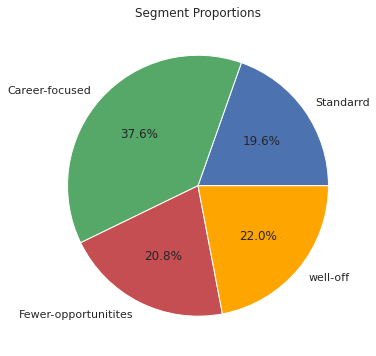

In [ ]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standarrd','Career-focused','Fewer-opportunitites','well-off'],
        autopct = '%1.1f%%',
        colors = ('b','g','r','orange'))
plt.title('Segment Proportions')

**Purchase Occasion and Purchase Incidence**

we will find a quantitative measure to describe the purchase behaivours by segments
- mean: avg behavior of each segment
- standard deviation : how homogenou each segment

In [ ]:
segments_mean = purchase_df_desc.groupby(['Segment']).mean()
segments_mean

,N_visitis,N_purchases,Avg_N_purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [ ]:
segments_std = purchase_df_desc.groupby(['Segment']).std()
segments_std

,N_visitis,N_purchases,Avg_N_purchases
Segment,,,
0,20.716152,25.900579,0.171787
1,16.390601,13.843068,0.120634
2,19.088937,16.715648,0.126056
3,44.864656,53.744530,0.200056


Let's see how often do people from different segments visit the store

Text(0, 0.5, 'Number of store visits')

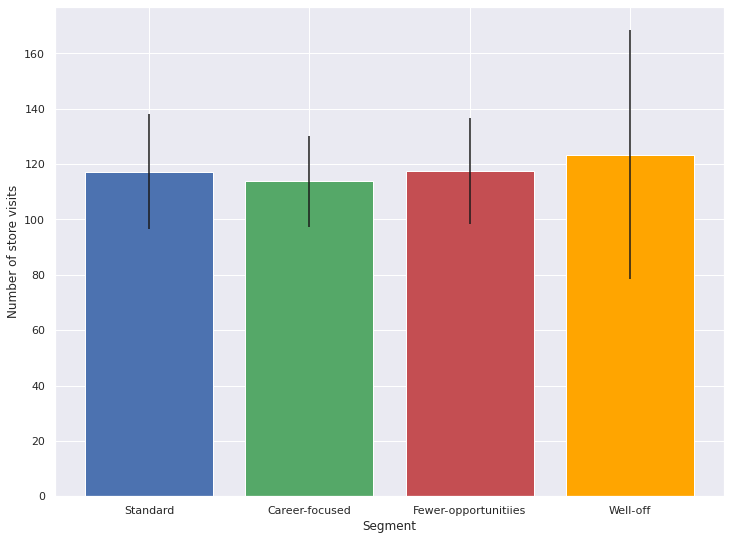

In [ ]:
plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label=('Standard','Career-focused','Fewer-opportunitiies','Well-off'),
        height = segments_mean['N_visitis'],
        #yerr shorts for y error
        yerr = segments_std['N_visitis'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of store visits')

Text(0, 0.5, 'Number of store purchases')

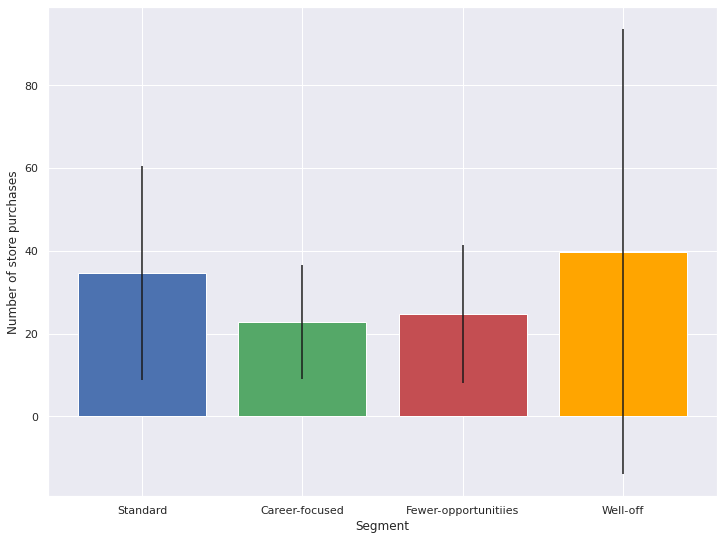

In [ ]:
plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label=('Standard','Career-focused','Fewer-opportunitiies','Well-off'),
        height = segments_mean['N_purchases'],
        #yerr shorts for y error
        yerr = segments_std['N_purchases'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of store purchases')

Text(0, 0.5, 'Avg Number of store visit')

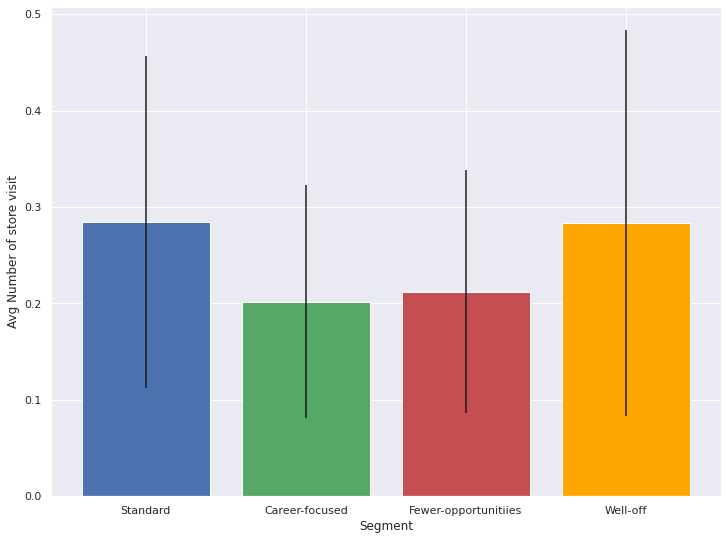

In [ ]:
#plot ave number of store visits by segment
plt.figure(figsize=(12,9))
plt.bar(x = (0,1,2,3),
        tick_label=('Standard','Career-focused','Fewer-opportunitiies','Well-off'),
        height = segments_mean['Avg_N_purchases'],
        #yerr shorts for y error
        yerr = segments_std['Avg_N_purchases'],
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Avg Number of store visit')

Brand Choice

In [ ]:
#incidence here indicates purchase occurred
purchase_df_incidence = purchase_df_predictors[purchase_df_predictors['Incidence']==1]
#crreate dummy variables for brand
brand_dummies = pd.get_dummies(purchase_df_incidence['Brand'],prefix='Brand',prefix_sep='_')

In [ ]:
brand_dummies['Segment'],brand_dummies['ID'] = purchase_df_incidence['Segment'],purchase_df_incidence['ID']

In [ ]:
temp = brand_dummies.groupby(['ID'],as_index=True).mean()
mean_brand_choice = temp.groupby(['Segment'],as_index=True).mean()

Text(0.5, 1.0, 'Avg. Brand Choice by segment')

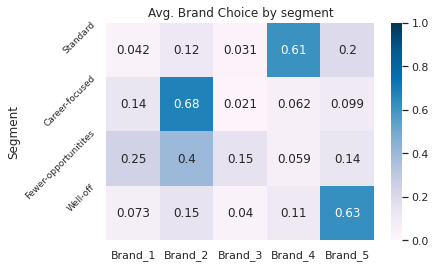

In [ ]:
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax=1,
            cmap='PuBu',
            annot=True)
plt.yticks([0,1,2,3],['Standard','Career-focused','Fewer-opportunitites','Well-off'],rotation = 45, fontsize = 9)
plt.title('Avg. Brand Choice by segment')

Revenue

In [ ]:
temp = purchase_df_predictors[purchase_df_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1']=temp['Price_1']*temp['Quantity']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
temp.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Revenue Brand 1
20,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1,2.94
557,200000006,636,1,1,5,0,0,1.31,1.56,2.00,2.24,2.79,1,1,1,0,0,0,0,39,1,112347,1,2,3,6.55
605,200000007,320,1,1,1,0,0,1.35,1.89,1.98,2.21,2.70,1,1,0,0,0,0,0,27,0,125190,2,1,3,1.35
800,200000009,374,1,1,2,0,0,1.21,1.87,2.02,2.21,2.69,1,0,0,0,0,0,0,25,0,108960,0,0,1,2.42
859,200000010,60,1,1,3,0,0,1.39,1.90,1.87,2.12,2.62,1,0,0,0,0,0,0,32,0,69370,0,0,1,4.17


In [ ]:
segments_brand_revenue = pd.DataFrame()

In [ ]:
segments_brand_revenue[['Segment','Revenue Brand 1']]=temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index = False).sum()
segments_brand_revenue

,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [ ]:
temp = purchase_df_predictors[purchase_df_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2']=temp['Price_2']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']]=temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index = False).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
temp = purchase_df_predictors[purchase_df_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3']=temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']]=temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index = False).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
temp = purchase_df_predictors[purchase_df_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4']=temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']]=temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index = False).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
temp = purchase_df_predictors[purchase_df_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5']=temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']]=temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index = False).sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                           segments_brand_revenue['Revenue Brand 2']+
                                           segments_brand_revenue['Revenue Brand 3']+
                                           segments_brand_revenue['Revenue Brand 4']+
                                           segments_brand_revenue['Revenue Brand 5'])

In [ ]:
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [ ]:
segments_brand_revenue['Segment Proportions']=segm_prop['Segment Proportions']

In [ ]:
segments_brand_revenue['Segment']=segments_brand_revenue['Segment'].map({0:'Standard',
                                                                         1:'Career-focused',
                                                                         2:'Fewer-opportunities',
                                                                         3:'Well-off'})
segments_brand_revenue=segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Career-focused,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
Fewer-opportunities,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
Well-off,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


# Predictive Analysis

Purchase Probability
- logistic probability
  - prob estimate
  - classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
 df_pa = purchase_df_predictors

In [ ]:
y = df_pa['Incidence']

In [ ]:
x = pd.DataFrame()
x['Mean_price']=(df_pa['Price_1']+
                 df_pa['Price_2']+
                 df_pa['Price_3']+
                 df_pa['Price_4']+
                 df_pa['Price_5'])/5

In [ ]:
model_purchase = LogisticRegression()

In [ ]:
model_purchase.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The model quantifies the exact relationship between price and purchase probability

In [ ]:
model_purchase.coef_

array([[-2.3480548]])

Price elasticity of purchase probability:% change in purchase probability in response to a 1% change in price

In [ ]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [ ]:
price_range=np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [ ]:
df_price_range = pd.DataFrame(price_range)

In [ ]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [ ]:
#2 columns in Y_pr, no purchase and purchase
#only take the second coloumn of array to get the prob of purchase
purchase_pr = Y_pr[:][:,1]

E = beta * price * (1-P(purchase))

In [ ]:
pe = model_purchase.coef_[:,0] * price_range * (1-purchase_pr)

In [ ]:
df_pe = pd.DataFrame(price_range)

In [ ]:
df_pe = df_pe.rename(columns={0:'Price Point'})
df_pe['Mean_PE']=pe

In [ ]:
#way not ommitting dataframe
pd.options.display.max_rows = None

Text(0.5, 1.0, 'Price Elasticity of Purrchase Prob')

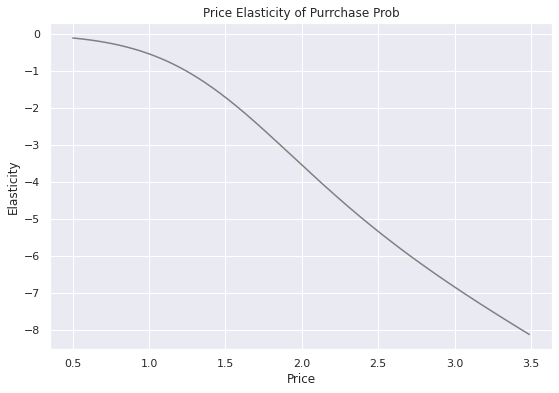

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purrchase Prob')

if abs(E) < 1, then inelastic
elastic otherwise 

Purchase Probability by Segment

- Segment 1- career - focused

In [ ]:
df_pa_segment_1 = df_pa[df_pa['Segment']==1]

Purchase Probability with Promotion Feature

Own and cross-price elasticity by Segment

### Data Preparation

In [ ]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [ ]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
7,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,1
12,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,1
20,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,1
25,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,1
30,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58622,200000500,296,1,2,6,0,0,1.48,1.89,2.01,2.18,2.69,0,0,0,0,0,0,0,42,1,120946,1,0,1
58649,200000500,460,1,1,12,0,0,1.35,1.57,2.02,2.21,2.70,1,1,0,0,0,0,0,42,1,120946,1,0,1
58675,200000500,641,1,2,7,0,0,1.50,1.85,2.06,2.24,2.79,1,1,0,0,0,0,0,42,1,120946,1,0,1
58688,200000500,697,1,2,6,0,0,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,42,1,120946,1,0,1


In [ ]:
Y = brand_choice['Brand']

Predict based on price

In [ ]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment'],
      dtype=object)

In [ ]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
#only select features above
X = brand_choice[features]

In [ ]:
#use multinomial logistic regression
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Results Interpretation

In [ ]:
model_brand_choice.coef_

array([[-3.91592323,  0.65847615,  2.41786309,  0.70410835, -0.20206658],
       [ 1.27462239, -1.87985073, -0.21261756, -0.2063344 ,  0.58787864],
       [ 1.62412264,  0.56207835,  0.50065459,  1.03946457,  0.45271938],
       [ 0.57454825,  0.39559325, -1.40057662, -1.24623733,  0.24935993],
       [ 0.44262995,  0.26370298, -1.3053235 , -0.29100119, -1.08789136]])

In [ ]:
#put them into a dataframe for better visility
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915923,0.658476,2.417863,0.704108,-0.202067
1,1.274622,-1.879851,-0.212618,-0.206334,0.587879
2,1.624123,0.562078,0.500655,1.039465,0.452719
3,0.574548,0.395593,-1.400577,-1.246237,0.249360
4,0.442630,0.263703,-1.305324,-0.291001,-1.087891


In [ ]:
#add row/column name for dataframe
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


Start with brand_1, the coefficeint with its own brand is negative
while is positive for all other prices except at 5, we already know that the higher the price of its own product, the lower the probability for its be purchased. so it makes sense for the own brand price coefficient be negative. on the other hand, the more the price of a competitor increases, the higher the probability of customers switching to our own brand would be. Heads: there is a positive relationship between our own Brands purchase probability that a competitor brand increasing their price. at this point you may realize that the choice probability for anyone brand and the choice probability for all the other brands are interrelated and the marketing mix to love hear brand reflects not only the choice probability for that brand with the choice probabilities for all other brands as well. these effects are known as own brand effects and cross brand effects. 


## Own Price Elasticity Brand 5

Positioning youself as a marketing analyst for Brand 5

In [ ]:
price_range=np.arange(0.5,3.5,0.01)
price_range

In [ ]:
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [ ]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [ ]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

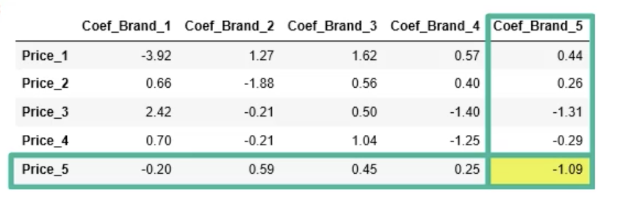

In [ ]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [ ]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [ ]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

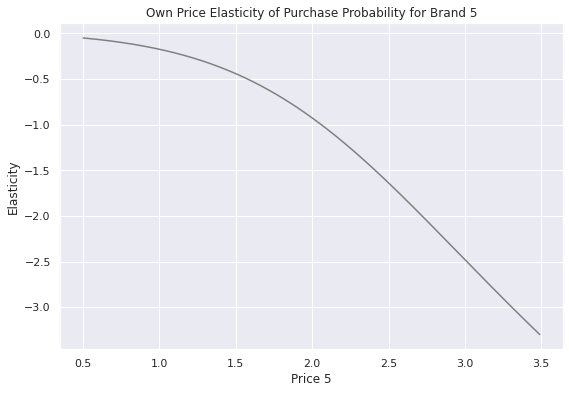

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [ ]:
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [ ]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [ ]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

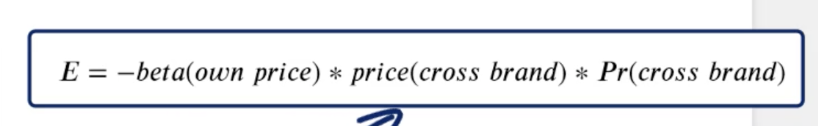

In [ ]:
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [ ]:
beta5

-1.09

In [ ]:
#use fomula before
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [ ]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096400,-0.211128,-0.119068,-0.030902,-0.010586,-0.125745,-0.195652,-0.049055,0.332012
1,0.51,-0.100468,-0.217696,-0.123250,-0.032668,-0.011191,-0.129862,-0.201773,-0.050616,0.337288
2,0.52,-0.104663,-0.224371,-0.127525,-0.034521,-0.011826,-0.134057,-0.207996,-0.052207,0.342507
3,0.53,-0.108988,-0.231155,-0.131896,-0.036465,-0.012492,-0.138332,-0.214323,-0.053827,0.347669
4,0.54,-0.113447,-0.238048,-0.136362,-0.038503,-0.013190,-0.142688,-0.220754,-0.055477,0.352773
5,0.55,-0.118042,-0.245052,-0.140926,-0.040640,-0.013922,-0.147126,-0.227289,-0.057158,0.357820
6,0.56,-0.122777,-0.252166,-0.145590,-0.042881,-0.014690,-0.151646,-0.233931,-0.058871,0.362809
7,0.57,-0.127655,-0.259391,-0.150354,-0.045230,-0.015494,-0.156251,-0.240679,-0.060615,0.367741
8,0.58,-0.132680,-0.266728,-0.155220,-0.047691,-0.016337,-0.160941,-0.247534,-0.062391,0.372614
9,0.59,-0.137855,-0.274179,-0.160190,-0.050269,-0.017221,-0.165716,-0.254497,-0.064199,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

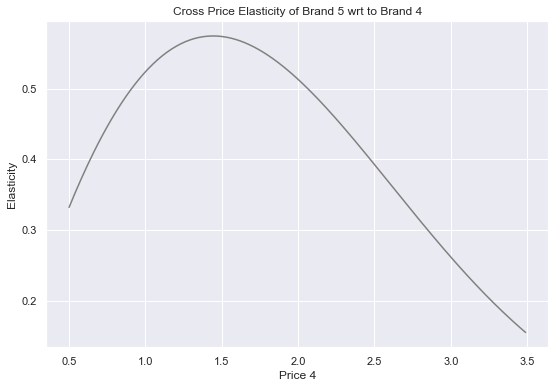

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

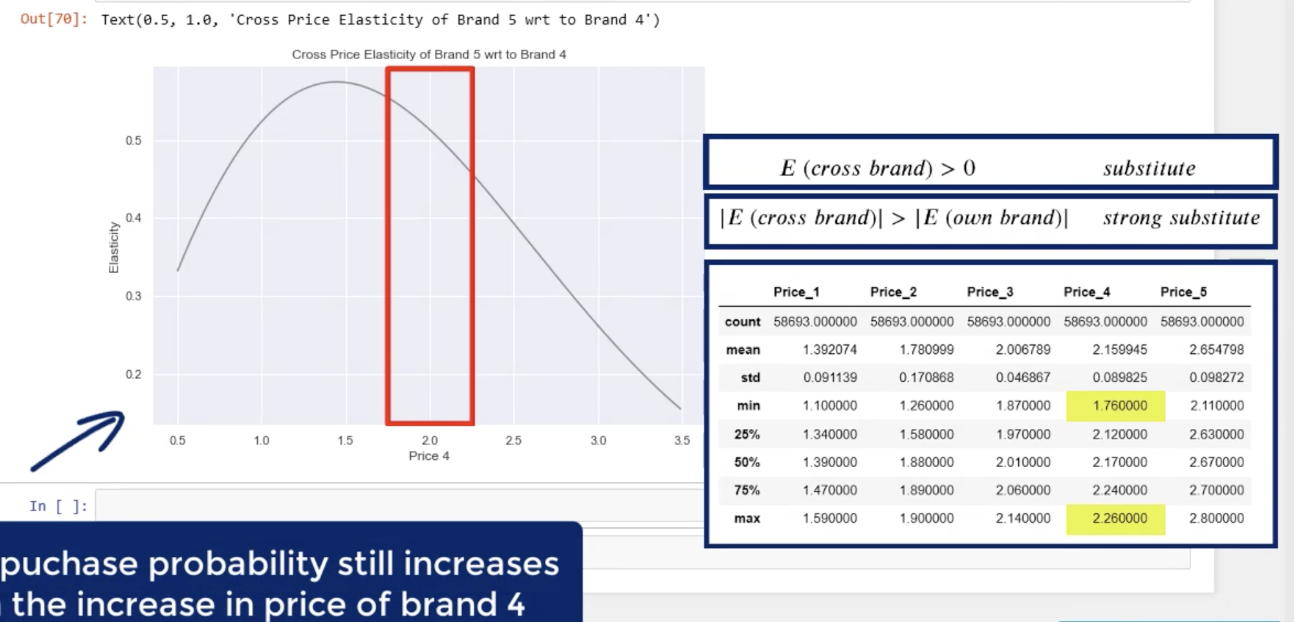

- we observe that the elasticities are positive across the price range. this indicates that a competitor brand for increases prices, the purchase probability for our own brand would increase. **the elasticity show us exactly how much more.**

- depending on the cross price elasticity can actually gain insights about the market itself. now is the cross price elasticity is greater than 0, the two products are considered **substitutes**, that's logical as brand 4 and brand 5 are both chocolate candy bars。

## Own and Cross-Price Elasticity by Segment

In [ ]:
#choose well-off segment
brand_choic_s3 = df_pa[(df_pa['Incidence']==1) & (df_pa['Segment']==3)]
pd.options.display.max_rows = 100
brand_choic_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
377,200000005,51,1,5,1,0,0,1.35,1.87,1.93,2.09,2.59,1,1,1,0,0,0,0,49,1,121466,1,2,3
378,200000005,57,1,5,1,5,1,1.39,1.90,1.91,2.12,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3
395,200000005,159,1,5,2,0,0,1.39,1.90,1.94,2.16,2.62,1,0,0,0,0,0,0,49,1,121466,1,2,3
397,200000005,178,1,5,3,0,0,1.48,1.50,1.99,2.16,2.49,0,0,0,1,1,0,0,49,1,121466,1,2,3
411,200000005,249,1,5,1,0,0,1.46,1.89,1.99,2.15,2.65,0,0,0,0,0,0,0,49,1,121466,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57587,200000491,690,1,5,2,5,1,1.50,1.87,2.06,2.24,2.78,0,1,0,0,0,0,0,35,1,150237,2,2,3
57588,200000491,697,1,5,5,5,1,1.42,1.51,1.97,2.24,2.78,0,0,0,0,0,0,0,35,1,150237,2,2,3
57589,200000491,704,1,5,5,5,1,1.41,1.85,2.01,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3
57590,200000491,714,1,5,1,5,1,1.50,1.80,2.09,2.24,2.79,0,0,0,0,0,0,0,35,1,150237,2,2,3


### $\color{orange}{\text{Well-Off}}$

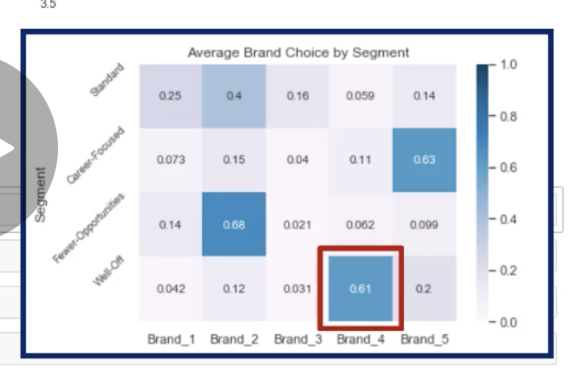

In [ ]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [ ]:
# model estimation
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

#coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [ ]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [ ]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096400,-0.211128,-0.119068,-0.030902,-0.010586,-0.125745,-0.195652,-0.049055,0.332012,-0.297298,0.482420
1,0.51,-0.100468,-0.217696,-0.123250,-0.032668,-0.011191,-0.129862,-0.201773,-0.050616,0.337288,-0.303344,0.491726
2,0.52,-0.104663,-0.224371,-0.127525,-0.034521,-0.011826,-0.134057,-0.207996,-0.052207,0.342507,-0.309400,0.501015
3,0.53,-0.108988,-0.231155,-0.131896,-0.036465,-0.012492,-0.138332,-0.214323,-0.053827,0.347669,-0.315467,0.510289
4,0.54,-0.113447,-0.238048,-0.136362,-0.038503,-0.013190,-0.142688,-0.220754,-0.055477,0.352773,-0.321545,0.519547
5,0.55,-0.118042,-0.245052,-0.140926,-0.040640,-0.013922,-0.147126,-0.227289,-0.057158,0.357820,-0.327634,0.528790
6,0.56,-0.122777,-0.252166,-0.145590,-0.042881,-0.014690,-0.151646,-0.233931,-0.058871,0.362809,-0.333736,0.538016
7,0.57,-0.127655,-0.259391,-0.150354,-0.045230,-0.015494,-0.156251,-0.240679,-0.060615,0.367741,-0.339849,0.547226
8,0.58,-0.132680,-0.266728,-0.155220,-0.047691,-0.016337,-0.160941,-0.247534,-0.062391,0.372614,-0.345975,0.556420
9,0.59,-0.137855,-0.274179,-0.160190,-0.050269,-0.017221,-0.165716,-0.254497,-0.064199,0.377430,-0.352114,0.565597


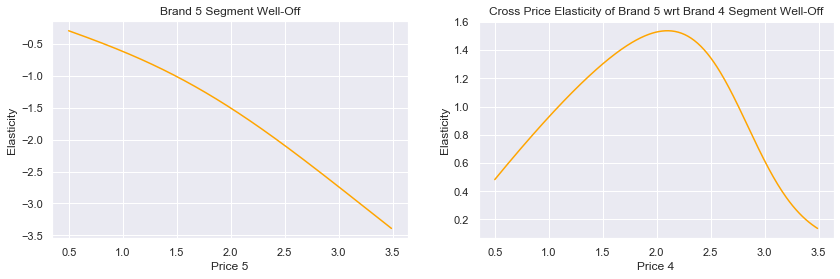

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

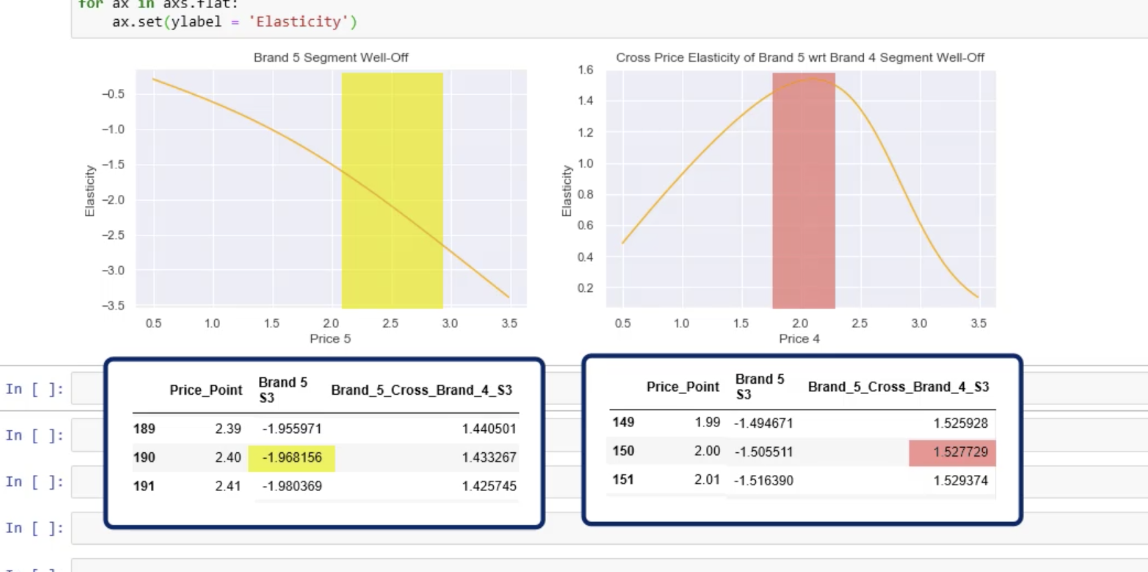

## Homework - Solution

### $\color{blue}{\text{Standard}}$

In [ ]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [ ]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [ ]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [ ]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [ ]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [ ]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [ ]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [ ]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [ ]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [ ]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [ ]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [ ]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096400,-0.211128,-0.119068,-0.030902,-0.010586,-0.125745,-0.195652,-0.049055,0.332012,-0.115857,0.174151,-0.043940,0.194777,-0.001036,0.181598,-0.297298,0.482420
1,0.51,-0.100468,-0.217696,-0.123250,-0.032668,-0.011191,-0.129862,-0.201773,-0.050616,0.337288,-0.118896,0.176207,-0.045027,0.197261,-0.001098,0.183895,-0.303344,0.491726
2,0.52,-0.104663,-0.224371,-0.127525,-0.034521,-0.011826,-0.134057,-0.207996,-0.052207,0.342507,-0.121970,0.178212,-0.046123,0.199694,-0.001163,0.186143,-0.309400,0.501015
3,0.53,-0.108988,-0.231155,-0.131896,-0.036465,-0.012492,-0.138332,-0.214323,-0.053827,0.347669,-0.125080,0.180166,-0.047228,0.202076,-0.001231,0.188343,-0.315467,0.510289
4,0.54,-0.113447,-0.238048,-0.136362,-0.038503,-0.013190,-0.142688,-0.220754,-0.055477,0.352773,-0.128225,0.182070,-0.048343,0.204408,-0.001303,0.190494,-0.321545,0.519547
5,0.55,-0.118042,-0.245052,-0.140926,-0.040640,-0.013922,-0.147126,-0.227289,-0.057158,0.357820,-0.131406,0.183923,-0.049467,0.206691,-0.001378,0.192596,-0.327634,0.528790
6,0.56,-0.122777,-0.252166,-0.145590,-0.042881,-0.014690,-0.151646,-0.233931,-0.058871,0.362809,-0.134624,0.185727,-0.050601,0.208923,-0.001458,0.194651,-0.333736,0.538016
7,0.57,-0.127655,-0.259391,-0.150354,-0.045230,-0.015494,-0.156251,-0.240679,-0.060615,0.367741,-0.137879,0.187482,-0.051745,0.211106,-0.001541,0.196659,-0.339849,0.547226
8,0.58,-0.132680,-0.266728,-0.155220,-0.047691,-0.016337,-0.160941,-0.247534,-0.062391,0.372614,-0.141171,0.189188,-0.052898,0.213240,-0.001629,0.198618,-0.345975,0.556420
9,0.59,-0.137855,-0.274179,-0.160190,-0.050269,-0.017221,-0.165716,-0.254497,-0.064199,0.377430,-0.144501,0.190845,-0.054061,0.215326,-0.001722,0.200531,-0.352114,0.565597


Text(0.5, 0, 'Price 4')

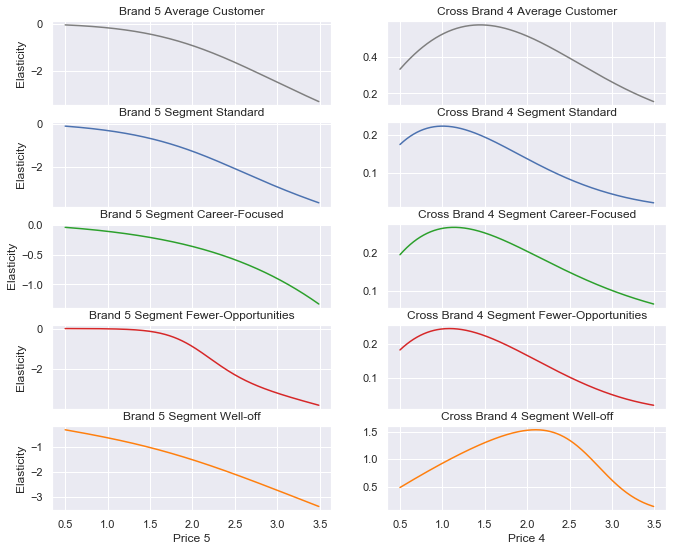

In [ ]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')